In [1]:
#importing necessary packages
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn import cluster
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import scipy.sparse as sp
from tqdm import tqdm
from tempfile import mkdtemp
import os.path as path
from collections import defaultdict


In [3]:
start = time.time()
docword_file = "/Users/arkaroy/Downloads/bag_of_words/docword.enron.txt"

with open(docword_file, 'r') as f:
    header_lines = [next(f) for _ in range(3)]  # Read the first 3 lines
    D, W, NNZ = map(int, header_lines)
    bog_matrix = sp.lil_array((D,W), dtype='int8')
    for line in tqdm(f):
        docID, wordID, _ = map(int, line.split())
        if docID <= D and wordID <= W:  # Check if indices are within range
            bog_matrix[docID-1 , wordID-1] = 1  # Adjust index to start from 0
        else:
            print("Warning: Index out of range")

print(D, W, NNZ)

3710420it [00:07, 526525.66it/s]

39861 28102 3710420


In [9]:
a = np.array([1,1,1])
b = np.array([0,0,0])

np.mean([a,b], axis = 0)

array([0.5, 0.5, 0.5])

In [4]:
class KMeansJaccard:
  """
  KMeans clustering using Jaccard distance metric.
  """
  def __init__(self, n_clusters, max_iter = 100, seed = 42):
    self.n_clusters = n_clusters
    self.clusters = None
    self.centroids = None
    random.seed(42)
    self.max_iter = max_iter
    self.current_iter_no=0
    
  def fit(self, data):
    """
    Performs KMeans clustering on the given data.

    Args:
      data: A list of lists, where each inner list represents a data point.
    """
    self._initialize_centroids(data)
    self._iterate_until_convergence(data)

  def _initialize_centroids(self, data):
    """
    Initializes centroids randomly from the data points.
    """
    centroid_indices = random.sample(range(D), self.n_clusters)
    self.centroids= [data.getrow(i).toarray()[0] for i in centroid_indices]

  def _jaccard_distance(self, point, centroid):
    """
    Calculates the Jaccard distance between a point and a centroid.
    """
    point = np.array(point)
    centroid = np.array(centroid)
    intersection = np.sum(point * centroid)
    union = np.sum(point) + np.sum(centroid) - intersection
    return 1 - float(intersection) / float(union) if union else 1.0

  def _assign_to_clusters(self, data):
    """
    Assigns each data point to the closest centroid based on Jaccard distance.
    """
    self.clusters = defaultdict(list)
    for i in range(D):
      point = data.getrow(i).toarray()[0]
      min_distance = float('inf')
      min_cluster = None
      
      for centroid in self.centroids:
        distance = self._jaccard_distance(point, centroid)
        if distance < min_distance:
          min_distance = distance
          min_cluster = centroid

      try:
        self.clusters[tuple(min_cluster)].append(i)
      except TypeError:
        raise TypeError(type(min_cluster), min_cluster, point, centroid, distance, [type(i) for i in self.centroids])

  def _update_centroids(self, data):
    """
    Updates the centroids based on the mean of the points in each cluster.
    """
    new_centroids = []
    for cluster, point_indices in self.clusters.items():
      if point_indices:
        points = [data.getrow(i).toarray()[0] for i in point_indices]
        # Jaccard distance doesn't have a meaningful centroid, we exercise our liberty to use a probablistic measure of centroid.
        new_centroid = np.mean(points, axis = 0)
        # print(new_centroid)
      else:
        new_centroid_index = random.randrange(D) # Reassign in case of empty cluster
        new_centroid = data.getrow(new_centroid_index).toarray()[0]
      new_centroids.append(new_centroid)
    self.centroids = new_centroids

  def _iterate_until_convergence(self, data):
    """
    Iterates until the centroids no longer change significantly.
    """
    prev_centroids = None
    while ((prev_centroids is None or not all(
        all(centroid == new_centroid) for centroid, new_centroid in zip(prev_centroids, self.centroids))) and (self.current_iter_no < self.max_iter)):
          
      prev_centroids = self.centroids.copy()
      self._assign_to_clusters(data)
      self._update_centroids(data)
      self.current_iter_no += 1
      print(f"Clusters = {self.n_clusters}, Iteration number = {self.current_iter_no}")

  def inertia(self, data):
    """
    Calculates the inertia (sum of squared distances to centroids) for current clusters.

    Returns:
      The total inertia of the clustering.
    """
    if not self.clusters:
      raise ValueError("Model not fitted yet. Call fit(data) before using inertia")
    inertia = 0
    for centroid, point_indices in self.clusters.items():
      points = [data.getrow(i).toarray()[0] for i in point_indices]
      for point in points:
        inertia += self._jaccard_distance(point, centroid)
    return inertia

  # def get_labels(self, data):
  #   """
  #   Assigns labels to new data points based on the closest centroid.

  #   Args:
  #     data: A list of lists, where each inner list represents a new data point.

  #   Returns:
  #     A list of cluster labels for the new data points.
  #   """
  #   labels = []
  #   for point in data:
  #     min_distance = float('inf')
  #     min_cluster = None
  #     for centroid in self.centroids:
  #       distance = self._jaccard_distance(point, centroid)
  #       if distance < min_distance:
  #         min_distance = distance
  #         min_cluster = centroid
  #     labels.append(min_cluster)
  #   return labels


In [4]:
class KMeansJaccard:
  """
  KMeans clustering using Jaccard distance metric.
  """
  def __init__(self, n_clusters, max_iter = 100, seed = 42):
    self.n_clusters = n_clusters
    self.clusters = None
    self.centroids = None
    random.seed(42)
    self.max_iter = max_iter
    self.current_iter_no=0
    
  def fit(self, data):
    """
    Performs KMeans clustering on the given data.

    Args:
      data: A list of lists, where each inner list represents a data point.
    """
    self._initialize_centroids(data)
    self._iterate_until_convergence(data)

  def _initialize_centroids(self, data):
    """
    Initializes centroids randomly from the data points.
    """
    centroid_indices = random.sample(range(D), self.n_clusters)
    self.centroids= [data.getrow(i).toarray()[0] for i in centroid_indices]

  def _jaccard_distance(self, point, centroid):
    """
    Calculates the Jaccard distance between a point and a centroid.
    """
    point = np.array(point)
    centroid = np.array(centroid)
    intersection = np.sum(point * centroid)
    union = np.sum(point) + np.sum(centroid) - intersection
    return 1 - float(intersection) / float(union) if union else 1.0

  def _assign_to_clusters(self, data):
    """
    Assigns each data point to the closest centroid based on Jaccard distance.
    """
    self.clusters = defaultdict(list)
    for i in range(D):
      point = data.getrow(i).toarray()[0]
      min_distance = float('inf')
      min_cluster = None
      
      for centroid in self.centroids:
        distance = self._jaccard_distance(point, centroid)
        if distance < min_distance:
          min_distance = distance
          min_cluster = centroid

      try:
        self.clusters[tuple(min_cluster)].append(i)
      except TypeError:
        raise TypeError(type(min_cluster), min_cluster, point, centroid, distance, [type(i) for i in self.centroids])

  def _update_centroids(self, data):
    """
    Updates the centroids based on the mean of the points in each cluster.
    """
    new_centroids = []
    for cluster, point_indices in self.clusters.items():
      if point_indices:
        points = [data.getrow(i).toarray()[0] for i in point_indices]
        # Jaccard distance doesn't have a meaningful centroid, we exercise our liberty to use a probablistic measure of centroid.
        new_centroid = np.mean(points, axis = 0)
        # print(new_centroid)
      else:
        new_centroid_index = random.randrange(D) # Reassign in case of empty cluster
        new_centroid = data.getrow(new_centroid_index).toarray()[0]
      new_centroids.append(new_centroid)
    self.centroids = new_centroids

  def _iterate_until_convergence(self, data):
    """
    Iterates until the centroids no longer change significantly.
    """
    prev_centroids = None
    while ((prev_centroids is None or not all(
        all(centroid == new_centroid) for centroid, new_centroid in zip(prev_centroids, self.centroids))) and (self.current_iter_no < self.max_iter)):
          
      prev_centroids = self.centroids.copy()
      self._assign_to_clusters(data)
      self._update_centroids(data)
      self.current_iter_no += 1
      print(f"Clusters = {self.n_clusters}, Iteration number = {self.current_iter_no}")

  def inertia(self, data):
    """
    Calculates the inertia (sum of squared distances to centroids) for current clusters.

    Returns:
      The total inertia of the clustering.
    """
    if not self.clusters:
      raise ValueError("Model not fitted yet. Call fit(data) before using inertia")
    inertia = 0
    for centroid, point_indices in self.clusters.items():
      points = [data.getrow(i).toarray()[0] for i in point_indices]
      for point in points:
        inertia += self._jaccard_distance(point, centroid)
    return inertia

  # def get_labels(self, data):
  #   """
  #   Assigns labels to new data points based on the closest centroid.

  #   Args:
  #     data: A list of lists, where each inner list represents a new data point.

  #   Returns:
  #     A list of cluster labels for the new data points.
  #   """
  #   labels = []
  #   for point in data:
  #     min_distance = float('inf')
  #     min_cluster = None
  #     for centroid in self.centroids:
  #       distance = self._jaccard_distance(point, centroid)
  #       if distance < min_distance:
  #         min_distance = distance
  #         min_cluster = centroid
  #     labels.append(min_cluster)
  #   return labels


In [11]:
a = defaultdict(list)
a['a'].append(1)
a

defaultdict(list, {'a': [1]})

In [5]:
#Fitting the model for different number of clusters
l = []
for i in tqdm(range(1,10)):
    model = KMeansJaccard(n_clusters=i, max_iter=100)
    model.fit(bog_matrix)
    l.append(model.inertia(bog_matrix))

  0%|                                                                                                                                                                                                                   | 0/9 [00:00<?, ?it/s]

Clusters = 1, Iteration number = 1
Clusters = 1, Iteration number = 2


 11%|██████████████████████▍                                                                                                                                                                                   | 1/9 [01:43<13:48, 103.59s/it]

Clusters = 2, Iteration number = 1
Clusters = 2, Iteration number = 2
Clusters = 2, Iteration number = 3
Clusters = 2, Iteration number = 4
Clusters = 2, Iteration number = 5
Clusters = 2, Iteration number = 6
Clusters = 2, Iteration number = 7
Clusters = 2, Iteration number = 8
Clusters = 2, Iteration number = 9
Clusters = 2, Iteration number = 10
Clusters = 2, Iteration number = 11
Clusters = 2, Iteration number = 12
Clusters = 2, Iteration number = 13


 22%|████████████████████████████████████████████▉                                                                                                                                                             | 2/9 [11:46<46:21, 397.30s/it]

Clusters = 3, Iteration number = 1
Clusters = 3, Iteration number = 2
Clusters = 3, Iteration number = 3
Clusters = 3, Iteration number = 4
Clusters = 3, Iteration number = 5
Clusters = 3, Iteration number = 6
Clusters = 3, Iteration number = 7
Clusters = 3, Iteration number = 8
Clusters = 3, Iteration number = 9
Clusters = 3, Iteration number = 10
Clusters = 3, Iteration number = 11
Clusters = 3, Iteration number = 12
Clusters = 3, Iteration number = 13
Clusters = 3, Iteration number = 14
Clusters = 3, Iteration number = 15
Clusters = 3, Iteration number = 16
Clusters = 3, Iteration number = 17
Clusters = 3, Iteration number = 18
Clusters = 3, Iteration number = 19
Clusters = 3, Iteration number = 20
Clusters = 3, Iteration number = 21
Clusters = 3, Iteration number = 22
Clusters = 3, Iteration number = 23


 33%|██████████████████████████████████████████████████████████████████▎                                                                                                                                    | 3/9 [59:58<2:33:37, 1536.28s/it]

Clusters = 4, Iteration number = 1
Clusters = 4, Iteration number = 2
Clusters = 4, Iteration number = 3
Clusters = 4, Iteration number = 4
Clusters = 4, Iteration number = 5
Clusters = 4, Iteration number = 6
Clusters = 4, Iteration number = 7
Clusters = 4, Iteration number = 8
Clusters = 4, Iteration number = 9
Clusters = 4, Iteration number = 10
Clusters = 4, Iteration number = 11
Clusters = 4, Iteration number = 12
Clusters = 4, Iteration number = 13
Clusters = 4, Iteration number = 14
Clusters = 4, Iteration number = 15
Clusters = 4, Iteration number = 16
Clusters = 4, Iteration number = 17
Clusters = 4, Iteration number = 18
Clusters = 4, Iteration number = 19
Clusters = 4, Iteration number = 20
Clusters = 4, Iteration number = 21
Clusters = 4, Iteration number = 22
Clusters = 4, Iteration number = 23
Clusters = 4, Iteration number = 24
Clusters = 4, Iteration number = 25
Clusters = 4, Iteration number = 26
Clusters = 4, Iteration number = 27
Clusters = 4, Iteration number = 28
C

 44%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                                             | 4/9 [1:37:16<2:31:06, 1813.31s/it]

Clusters = 5, Iteration number = 1
Clusters = 5, Iteration number = 2
Clusters = 5, Iteration number = 3
Clusters = 5, Iteration number = 4
Clusters = 5, Iteration number = 5
Clusters = 5, Iteration number = 6
Clusters = 5, Iteration number = 7
Clusters = 5, Iteration number = 8
Clusters = 5, Iteration number = 9
Clusters = 5, Iteration number = 10
Clusters = 5, Iteration number = 11
Clusters = 5, Iteration number = 12
Clusters = 5, Iteration number = 13
Clusters = 5, Iteration number = 14
Clusters = 5, Iteration number = 15
Clusters = 5, Iteration number = 16
Clusters = 5, Iteration number = 17
Clusters = 5, Iteration number = 18
Clusters = 5, Iteration number = 19
Clusters = 5, Iteration number = 20
Clusters = 5, Iteration number = 21
Clusters = 5, Iteration number = 22
Clusters = 5, Iteration number = 23
Clusters = 5, Iteration number = 24
Clusters = 5, Iteration number = 25
Clusters = 5, Iteration number = 26
Clusters = 5, Iteration number = 27
Clusters = 5, Iteration number = 28
C

 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 5/9 [2:15:48<2:12:52, 1993.15s/it]

Clusters = 6, Iteration number = 1
Clusters = 6, Iteration number = 2
Clusters = 6, Iteration number = 3
Clusters = 6, Iteration number = 4
Clusters = 6, Iteration number = 5
Clusters = 6, Iteration number = 6
Clusters = 6, Iteration number = 7
Clusters = 6, Iteration number = 8
Clusters = 6, Iteration number = 9
Clusters = 6, Iteration number = 10
Clusters = 6, Iteration number = 11
Clusters = 6, Iteration number = 12
Clusters = 6, Iteration number = 13
Clusters = 6, Iteration number = 14
Clusters = 6, Iteration number = 15
Clusters = 6, Iteration number = 16
Clusters = 6, Iteration number = 17
Clusters = 6, Iteration number = 18
Clusters = 6, Iteration number = 19
Clusters = 6, Iteration number = 20
Clusters = 6, Iteration number = 21
Clusters = 6, Iteration number = 22
Clusters = 6, Iteration number = 23
Clusters = 6, Iteration number = 24
Clusters = 6, Iteration number = 25
Clusters = 6, Iteration number = 26
Clusters = 6, Iteration number = 27
Clusters = 6, Iteration number = 28
C

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 6/9 [3:04:16<1:55:12, 2304.24s/it]

Clusters = 7, Iteration number = 1
Clusters = 7, Iteration number = 2
Clusters = 7, Iteration number = 3
Clusters = 7, Iteration number = 4
Clusters = 7, Iteration number = 5
Clusters = 7, Iteration number = 6
Clusters = 7, Iteration number = 7
Clusters = 7, Iteration number = 8
Clusters = 7, Iteration number = 9
Clusters = 7, Iteration number = 10
Clusters = 7, Iteration number = 11
Clusters = 7, Iteration number = 12
Clusters = 7, Iteration number = 13
Clusters = 7, Iteration number = 14
Clusters = 7, Iteration number = 15
Clusters = 7, Iteration number = 16
Clusters = 7, Iteration number = 17
Clusters = 7, Iteration number = 18
Clusters = 7, Iteration number = 19
Clusters = 7, Iteration number = 20
Clusters = 7, Iteration number = 21
Clusters = 7, Iteration number = 22
Clusters = 7, Iteration number = 23
Clusters = 7, Iteration number = 24
Clusters = 7, Iteration number = 25
Clusters = 7, Iteration number = 26
Clusters = 7, Iteration number = 27
Clusters = 7, Iteration number = 28
C

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 7/9 [3:50:20<1:21:49, 2454.67s/it]

Clusters = 8, Iteration number = 1
Clusters = 8, Iteration number = 2
Clusters = 8, Iteration number = 3
Clusters = 8, Iteration number = 4
Clusters = 8, Iteration number = 5
Clusters = 8, Iteration number = 6
Clusters = 8, Iteration number = 7
Clusters = 8, Iteration number = 8
Clusters = 8, Iteration number = 9
Clusters = 8, Iteration number = 10
Clusters = 8, Iteration number = 11
Clusters = 8, Iteration number = 12
Clusters = 8, Iteration number = 13
Clusters = 8, Iteration number = 14
Clusters = 8, Iteration number = 15
Clusters = 8, Iteration number = 16
Clusters = 8, Iteration number = 17
Clusters = 8, Iteration number = 18
Clusters = 8, Iteration number = 19
Clusters = 8, Iteration number = 20
Clusters = 8, Iteration number = 21
Clusters = 8, Iteration number = 22
Clusters = 8, Iteration number = 23
Clusters = 8, Iteration number = 24
Clusters = 8, Iteration number = 25
Clusters = 8, Iteration number = 26
Clusters = 8, Iteration number = 27
Clusters = 8, Iteration number = 28
C

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 8/9 [4:29:03<40:12, 2412.66s/it]

Clusters = 9, Iteration number = 1
Clusters = 9, Iteration number = 2
Clusters = 9, Iteration number = 3
Clusters = 9, Iteration number = 4
Clusters = 9, Iteration number = 5
Clusters = 9, Iteration number = 6
Clusters = 9, Iteration number = 7
Clusters = 9, Iteration number = 8
Clusters = 9, Iteration number = 9
Clusters = 9, Iteration number = 10
Clusters = 9, Iteration number = 11
Clusters = 9, Iteration number = 12
Clusters = 9, Iteration number = 13
Clusters = 9, Iteration number = 14
Clusters = 9, Iteration number = 15
Clusters = 9, Iteration number = 16
Clusters = 9, Iteration number = 17
Clusters = 9, Iteration number = 18
Clusters = 9, Iteration number = 19
Clusters = 9, Iteration number = 20
Clusters = 9, Iteration number = 21
Clusters = 9, Iteration number = 22
Clusters = 9, Iteration number = 23
Clusters = 9, Iteration number = 24
Clusters = 9, Iteration number = 25
Clusters = 9, Iteration number = 26
Clusters = 9, Iteration number = 27
Clusters = 9, Iteration number = 28
C

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [5:31:36<00:00, 2210.73s/it]


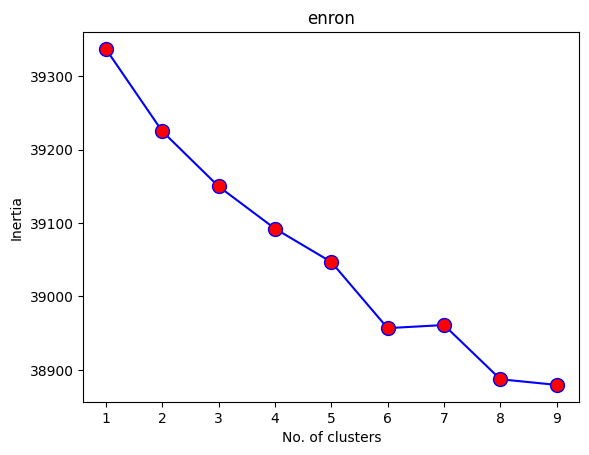

In [6]:
plt.title("enron")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.plot(list(range(1,10)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [8]:
end = time.time()
print("Time taken:",end-start)

Time taken: 22961.25327181816


In [9]:
start = time.time()
docword_file = "/Users/arkaroy/Downloads/bag_of_words/docword.nips.txt"

with open(docword_file, 'r') as f:
    header_lines = [next(f) for _ in range(3)]  # Read the first 3 lines
    D, W, NNZ = map(int, header_lines)
    bog_matrix = sp.lil_array((D,W), dtype='int8')
    for line in tqdm(f):
        docID, wordID, _ = map(int, line.split())
        if docID <= D and wordID <= W:  # Check if indices are within range
            bog_matrix[docID-1 , wordID-1] = 1  # Adjust index to start from 0
        else:
            print("Warning: Index out of range")

print(D, W, NNZ)

746316it [00:01, 541358.32it/s]

1500 12419 746316


In [10]:
#Fitting the model for different number of clusters
l = []
for i in tqdm(range(1,10)):
    model = KMeansJaccard(n_clusters=i, max_iter=100)
    model.fit(bog_matrix)
    l.append(model.inertia(bog_matrix))

  0%|                                                                                                                                                                                                                   | 0/9 [00:00<?, ?it/s]

Clusters = 1, Iteration number = 1
Clusters = 1, Iteration number = 2


 11%|██████████████████████▌                                                                                                                                                                                    | 1/9 [00:02<00:18,  2.34s/it]

Clusters = 2, Iteration number = 1
Clusters = 2, Iteration number = 2
Clusters = 2, Iteration number = 3
Clusters = 2, Iteration number = 4
Clusters = 2, Iteration number = 5
Clusters = 2, Iteration number = 6
Clusters = 2, Iteration number = 7
Clusters = 2, Iteration number = 8
Clusters = 2, Iteration number = 9


 22%|█████████████████████████████████████████████                                                                                                                                                              | 2/9 [00:11<00:43,  6.25s/it]

Clusters = 3, Iteration number = 1
Clusters = 3, Iteration number = 2
Clusters = 3, Iteration number = 3
Clusters = 3, Iteration number = 4
Clusters = 3, Iteration number = 5
Clusters = 3, Iteration number = 6
Clusters = 3, Iteration number = 7
Clusters = 3, Iteration number = 8
Clusters = 3, Iteration number = 9
Clusters = 3, Iteration number = 10
Clusters = 3, Iteration number = 11


 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 3/9 [00:23<00:54,  9.03s/it]

Clusters = 4, Iteration number = 1
Clusters = 4, Iteration number = 2
Clusters = 4, Iteration number = 3
Clusters = 4, Iteration number = 4
Clusters = 4, Iteration number = 5
Clusters = 4, Iteration number = 6
Clusters = 4, Iteration number = 7
Clusters = 4, Iteration number = 8
Clusters = 4, Iteration number = 9
Clusters = 4, Iteration number = 10
Clusters = 4, Iteration number = 11
Clusters = 4, Iteration number = 12
Clusters = 4, Iteration number = 13


 44%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 4/9 [00:38<00:57, 11.42s/it]

Clusters = 5, Iteration number = 1
Clusters = 5, Iteration number = 2
Clusters = 5, Iteration number = 3
Clusters = 5, Iteration number = 4
Clusters = 5, Iteration number = 5
Clusters = 5, Iteration number = 6
Clusters = 5, Iteration number = 7
Clusters = 5, Iteration number = 8
Clusters = 5, Iteration number = 9
Clusters = 5, Iteration number = 10
Clusters = 5, Iteration number = 11
Clusters = 5, Iteration number = 12
Clusters = 5, Iteration number = 13
Clusters = 5, Iteration number = 14


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 5/9 [00:56<00:55, 13.76s/it]

Clusters = 6, Iteration number = 1
Clusters = 6, Iteration number = 2
Clusters = 6, Iteration number = 3
Clusters = 6, Iteration number = 4
Clusters = 6, Iteration number = 5
Clusters = 6, Iteration number = 6
Clusters = 6, Iteration number = 7
Clusters = 6, Iteration number = 8
Clusters = 6, Iteration number = 9
Clusters = 6, Iteration number = 10
Clusters = 6, Iteration number = 11
Clusters = 6, Iteration number = 12
Clusters = 6, Iteration number = 13
Clusters = 6, Iteration number = 14
Clusters = 6, Iteration number = 15
Clusters = 6, Iteration number = 16
Clusters = 6, Iteration number = 17
Clusters = 6, Iteration number = 18
Clusters = 6, Iteration number = 19
Clusters = 6, Iteration number = 20
Clusters = 6, Iteration number = 21
Clusters = 6, Iteration number = 22
Clusters = 6, Iteration number = 23
Clusters = 6, Iteration number = 24
Clusters = 6, Iteration number = 25
Clusters = 6, Iteration number = 26
Clusters = 6, Iteration number = 27
Clusters = 6, Iteration number = 28
C

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 6/9 [01:36<01:07, 22.53s/it]

Clusters = 7, Iteration number = 1
Clusters = 7, Iteration number = 2
Clusters = 7, Iteration number = 3
Clusters = 7, Iteration number = 4
Clusters = 7, Iteration number = 5
Clusters = 7, Iteration number = 6
Clusters = 7, Iteration number = 7
Clusters = 7, Iteration number = 8
Clusters = 7, Iteration number = 9
Clusters = 7, Iteration number = 10
Clusters = 7, Iteration number = 11
Clusters = 7, Iteration number = 12
Clusters = 7, Iteration number = 13
Clusters = 7, Iteration number = 14
Clusters = 7, Iteration number = 15
Clusters = 7, Iteration number = 16
Clusters = 7, Iteration number = 17
Clusters = 7, Iteration number = 18
Clusters = 7, Iteration number = 19
Clusters = 7, Iteration number = 20
Clusters = 7, Iteration number = 21
Clusters = 7, Iteration number = 22
Clusters = 7, Iteration number = 23
Clusters = 7, Iteration number = 24
Clusters = 7, Iteration number = 25
Clusters = 7, Iteration number = 26
Clusters = 7, Iteration number = 27
Clusters = 7, Iteration number = 28
C

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 7/9 [02:27<01:03, 31.90s/it]

Clusters = 8, Iteration number = 1
Clusters = 8, Iteration number = 2
Clusters = 8, Iteration number = 3
Clusters = 8, Iteration number = 4
Clusters = 8, Iteration number = 5
Clusters = 8, Iteration number = 6
Clusters = 8, Iteration number = 7
Clusters = 8, Iteration number = 8
Clusters = 8, Iteration number = 9
Clusters = 8, Iteration number = 10
Clusters = 8, Iteration number = 11
Clusters = 8, Iteration number = 12
Clusters = 8, Iteration number = 13
Clusters = 8, Iteration number = 14
Clusters = 8, Iteration number = 15
Clusters = 8, Iteration number = 16


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 8/9 [02:48<00:28, 28.47s/it]

Clusters = 9, Iteration number = 1
Clusters = 9, Iteration number = 2
Clusters = 9, Iteration number = 3
Clusters = 9, Iteration number = 4
Clusters = 9, Iteration number = 5
Clusters = 9, Iteration number = 6
Clusters = 9, Iteration number = 7
Clusters = 9, Iteration number = 8
Clusters = 9, Iteration number = 9
Clusters = 9, Iteration number = 10
Clusters = 9, Iteration number = 11
Clusters = 9, Iteration number = 12
Clusters = 9, Iteration number = 13
Clusters = 9, Iteration number = 14
Clusters = 9, Iteration number = 15
Clusters = 9, Iteration number = 16
Clusters = 9, Iteration number = 17
Clusters = 9, Iteration number = 18


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:13<00:00, 21.51s/it]


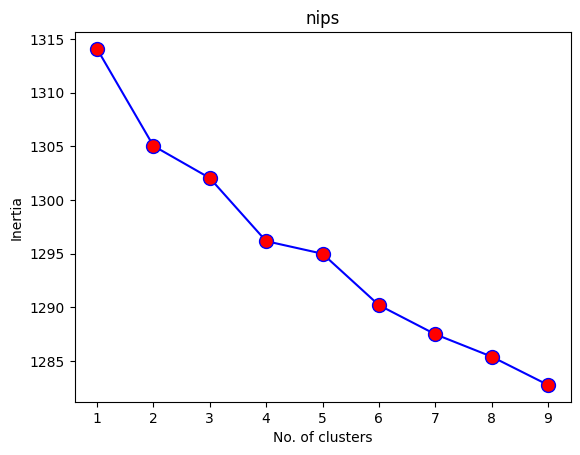

In [12]:
plt.title("nips")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.plot(list(range(1,10)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [13]:
end = time.time()
print("Time taken:",end-start)

Time taken: 532.4007608890533


In [18]:
start = time.time()
docword_file = "/Users/arkaroy/Downloads/bag_of_words/docword.kos.txt"

with open(docword_file, 'r') as f:
    header_lines = [next(f) for _ in range(3)]  # Read the first 3 lines
    D, W, NNZ = map(int, header_lines)
    bog_matrix = sp.lil_array((D,W), dtype='int8')
    for line in tqdm(f):
        docID, wordID, _ = map(int, line.split())
        if docID <= D and wordID <= W:  # Check if indices are within range
            bog_matrix[docID-1 , wordID-1] = 1  # Adjust index to start from 0
        else:
            print("Warning: Index out of range")

print(D, W, NNZ)

353160it [00:00, 514828.49it/s]

3430 6906 353160


In [19]:
#Fitting the model for different number of clusters
l = []
for i in tqdm(range(1,10)):
    model = KMeansJaccard(n_clusters=i, max_iter=100)
    model.fit(bog_matrix)
    l.append(model.inertia(bog_matrix))

  0%|                                                                                                                                                                                                                   | 0/9 [00:00<?, ?it/s]

Clusters = 1, Iteration number = 1
Clusters = 1, Iteration number = 2


 11%|██████████████████████▌                                                                                                                                                                                    | 1/9 [00:02<00:19,  2.39s/it]

Clusters = 2, Iteration number = 1
Clusters = 2, Iteration number = 2
Clusters = 2, Iteration number = 3
Clusters = 2, Iteration number = 4
Clusters = 2, Iteration number = 5
Clusters = 2, Iteration number = 6
Clusters = 2, Iteration number = 7
Clusters = 2, Iteration number = 8
Clusters = 2, Iteration number = 9
Clusters = 2, Iteration number = 10
Clusters = 2, Iteration number = 11
Clusters = 2, Iteration number = 12
Clusters = 2, Iteration number = 13


 22%|█████████████████████████████████████████████                                                                                                                                                              | 2/9 [00:16<01:03,  9.06s/it]

Clusters = 3, Iteration number = 1
Clusters = 3, Iteration number = 2
Clusters = 3, Iteration number = 3
Clusters = 3, Iteration number = 4
Clusters = 3, Iteration number = 5
Clusters = 3, Iteration number = 6
Clusters = 3, Iteration number = 7
Clusters = 3, Iteration number = 8
Clusters = 3, Iteration number = 9
Clusters = 3, Iteration number = 10
Clusters = 3, Iteration number = 11
Clusters = 3, Iteration number = 12
Clusters = 3, Iteration number = 13
Clusters = 3, Iteration number = 14
Clusters = 3, Iteration number = 15
Clusters = 3, Iteration number = 16
Clusters = 3, Iteration number = 17
Clusters = 3, Iteration number = 18
Clusters = 3, Iteration number = 19
Clusters = 3, Iteration number = 20
Clusters = 3, Iteration number = 21
Clusters = 3, Iteration number = 22
Clusters = 3, Iteration number = 23
Clusters = 3, Iteration number = 24
Clusters = 3, Iteration number = 25
Clusters = 3, Iteration number = 26
Clusters = 3, Iteration number = 27
Clusters = 3, Iteration number = 28
C

 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 3/9 [00:51<02:07, 21.19s/it]

Clusters = 4, Iteration number = 1
Clusters = 4, Iteration number = 2
Clusters = 4, Iteration number = 3
Clusters = 4, Iteration number = 4
Clusters = 4, Iteration number = 5
Clusters = 4, Iteration number = 6
Clusters = 4, Iteration number = 7
Clusters = 4, Iteration number = 8
Clusters = 4, Iteration number = 9
Clusters = 4, Iteration number = 10
Clusters = 4, Iteration number = 11
Clusters = 4, Iteration number = 12
Clusters = 4, Iteration number = 13
Clusters = 4, Iteration number = 14
Clusters = 4, Iteration number = 15
Clusters = 4, Iteration number = 16
Clusters = 4, Iteration number = 17
Clusters = 4, Iteration number = 18
Clusters = 4, Iteration number = 19
Clusters = 4, Iteration number = 20
Clusters = 4, Iteration number = 21
Clusters = 4, Iteration number = 22
Clusters = 4, Iteration number = 23
Clusters = 4, Iteration number = 24
Clusters = 4, Iteration number = 25
Clusters = 4, Iteration number = 26
Clusters = 4, Iteration number = 27
Clusters = 4, Iteration number = 28


 44%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 4/9 [01:24<02:09, 25.83s/it]

Clusters = 5, Iteration number = 1
Clusters = 5, Iteration number = 2
Clusters = 5, Iteration number = 3
Clusters = 5, Iteration number = 4
Clusters = 5, Iteration number = 5
Clusters = 5, Iteration number = 6
Clusters = 5, Iteration number = 7
Clusters = 5, Iteration number = 8
Clusters = 5, Iteration number = 9
Clusters = 5, Iteration number = 10
Clusters = 5, Iteration number = 11
Clusters = 5, Iteration number = 12
Clusters = 5, Iteration number = 13
Clusters = 5, Iteration number = 14
Clusters = 5, Iteration number = 15
Clusters = 5, Iteration number = 16
Clusters = 5, Iteration number = 17
Clusters = 5, Iteration number = 18
Clusters = 5, Iteration number = 19
Clusters = 5, Iteration number = 20
Clusters = 5, Iteration number = 21
Clusters = 5, Iteration number = 22
Clusters = 5, Iteration number = 23
Clusters = 5, Iteration number = 24
Clusters = 5, Iteration number = 25
Clusters = 5, Iteration number = 26


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                          | 5/9 [01:57<01:52, 28.17s/it]

Clusters = 6, Iteration number = 1
Clusters = 6, Iteration number = 2
Clusters = 6, Iteration number = 3
Clusters = 6, Iteration number = 4
Clusters = 6, Iteration number = 5
Clusters = 6, Iteration number = 6
Clusters = 6, Iteration number = 7
Clusters = 6, Iteration number = 8
Clusters = 6, Iteration number = 9
Clusters = 6, Iteration number = 10
Clusters = 6, Iteration number = 11
Clusters = 6, Iteration number = 12
Clusters = 6, Iteration number = 13
Clusters = 6, Iteration number = 14
Clusters = 6, Iteration number = 15
Clusters = 6, Iteration number = 16
Clusters = 6, Iteration number = 17
Clusters = 6, Iteration number = 18
Clusters = 6, Iteration number = 19
Clusters = 6, Iteration number = 20
Clusters = 6, Iteration number = 21
Clusters = 6, Iteration number = 22
Clusters = 6, Iteration number = 23
Clusters = 6, Iteration number = 24
Clusters = 6, Iteration number = 25
Clusters = 6, Iteration number = 26
Clusters = 6, Iteration number = 27
Clusters = 6, Iteration number = 28
C

 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 6/9 [02:40<01:40, 33.36s/it]

Clusters = 7, Iteration number = 1
Clusters = 7, Iteration number = 2
Clusters = 7, Iteration number = 3
Clusters = 7, Iteration number = 4
Clusters = 7, Iteration number = 5
Clusters = 7, Iteration number = 6
Clusters = 7, Iteration number = 7
Clusters = 7, Iteration number = 8
Clusters = 7, Iteration number = 9
Clusters = 7, Iteration number = 10
Clusters = 7, Iteration number = 11
Clusters = 7, Iteration number = 12
Clusters = 7, Iteration number = 13
Clusters = 7, Iteration number = 14
Clusters = 7, Iteration number = 15
Clusters = 7, Iteration number = 16
Clusters = 7, Iteration number = 17
Clusters = 7, Iteration number = 18
Clusters = 7, Iteration number = 19
Clusters = 7, Iteration number = 20
Clusters = 7, Iteration number = 21
Clusters = 7, Iteration number = 22
Clusters = 7, Iteration number = 23
Clusters = 7, Iteration number = 24
Clusters = 7, Iteration number = 25
Clusters = 7, Iteration number = 26
Clusters = 7, Iteration number = 27
Clusters = 7, Iteration number = 28
C

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 7/9 [03:21<01:11, 35.89s/it]

Clusters = 8, Iteration number = 1
Clusters = 8, Iteration number = 2
Clusters = 8, Iteration number = 3
Clusters = 8, Iteration number = 4
Clusters = 8, Iteration number = 5
Clusters = 8, Iteration number = 6
Clusters = 8, Iteration number = 7
Clusters = 8, Iteration number = 8
Clusters = 8, Iteration number = 9
Clusters = 8, Iteration number = 10
Clusters = 8, Iteration number = 11
Clusters = 8, Iteration number = 12
Clusters = 8, Iteration number = 13
Clusters = 8, Iteration number = 14
Clusters = 8, Iteration number = 15
Clusters = 8, Iteration number = 16
Clusters = 8, Iteration number = 17
Clusters = 8, Iteration number = 18
Clusters = 8, Iteration number = 19
Clusters = 8, Iteration number = 20
Clusters = 8, Iteration number = 21
Clusters = 8, Iteration number = 22
Clusters = 8, Iteration number = 23
Clusters = 8, Iteration number = 24
Clusters = 8, Iteration number = 25
Clusters = 8, Iteration number = 26
Clusters = 8, Iteration number = 27
Clusters = 8, Iteration number = 28
C

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 8/9 [04:14<00:41, 41.46s/it]

Clusters = 9, Iteration number = 1
Clusters = 9, Iteration number = 2
Clusters = 9, Iteration number = 3
Clusters = 9, Iteration number = 4
Clusters = 9, Iteration number = 5
Clusters = 9, Iteration number = 6
Clusters = 9, Iteration number = 7
Clusters = 9, Iteration number = 8
Clusters = 9, Iteration number = 9
Clusters = 9, Iteration number = 10
Clusters = 9, Iteration number = 11
Clusters = 9, Iteration number = 12
Clusters = 9, Iteration number = 13
Clusters = 9, Iteration number = 14
Clusters = 9, Iteration number = 15
Clusters = 9, Iteration number = 16


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [04:38<00:00, 30.90s/it]


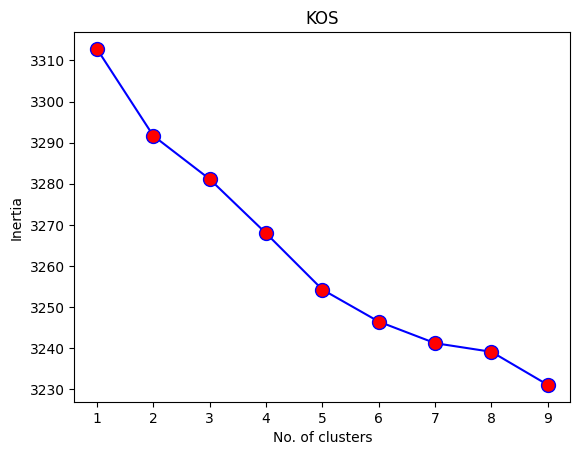

In [20]:
plt.title("KOS")
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.plot(list(range(1,10)),l,c="b",marker="o",markerfacecolor="red",markersize=10)

In [21]:
end = time.time()
print("Time taken:",end-start)

Time taken: 280.6006381511688
